In [1]:
#use data from 
#Varshney, Chen, Paniaqua, Hall and Chklovskii in "Structural properties of the C. elegans neuronal network" 
#PLoS Comput. Biol. Feb 3, 2011 3:7:e1001066 (doi:10.1371/journal.pcbi.1001066)
#http://www.wormatlas.org/neuronalwiring.html

import xlrd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

animal = '_c_elegans_'

#create total graph, gap junction graph, and chemical synapse graph
G = nx.DiGraph()
gj_G = nx.DiGraph()
cs_G = nx.DiGraph()

# add  nodes and edges
edge_book = xlrd.open_workbook('C_elegans_Connect.xlsx')
edge_sheet = edge_book.sheets()[0]
for row_num, row in enumerate(edge_sheet.get_rows()):
	if row_num >0:
		source = row[0].value.encode('ascii','ignore')
		target = row[1].value.encode('ascii','ignore')
		G.add_node(source)
		G.add_node(target)
		G.add_edge(source,target)
		if row[2].value.encode('ascii','ignore')=='GapJunction':
			gj_G.add_nodes_from([source,target])
	    	gj_G.add_edge(source,target)
		if row[2].value.encode('ascii','ignore')=='Send':
			cs_G.add_nodes_from([source,target])
			cs_G.add_edge(source,target)

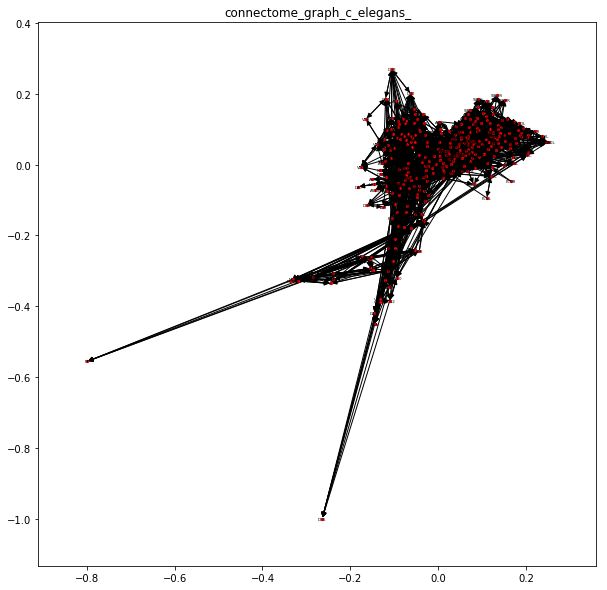

In [8]:
#plot connectome graph
plt.figure(figsize = (10,10))
pos=nx.spring_layout(G)
nx.draw_networkx(G,pos=pos, node_size = 5, linewidths = 1., font_size=4)
plt.title('connectome_graph'+animal)
plt.savefig('connectome_graph'+animal+'2.eps')

plt.show()

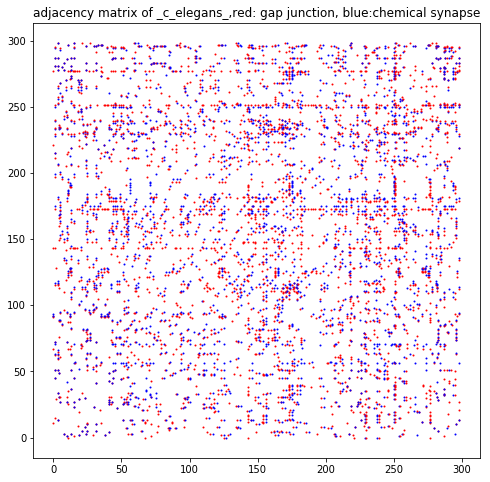

In [30]:
#plot adjacency matrix

adj_G = nx.adjacency_matrix(G)
adj_gj_G = nx.adjacency_matrix(gj_G)
adj_cs_G = nx.adjacency_matrix(cs_G)

adj_G = adj_G.todense()
adj_gj_G = adj_gj_G.todense()
adj_cs_G = adj_cs_G.todense()


plt.figure(figsize=(8,8))
for i in range(np.size(G.nodes())):
    for j in range(np.size(G.nodes())):
        if adj_gj_G[i,j]==1:
            plt.scatter(i,j,c='r',s = 1)
        if adj_cs_G[i,j]==1:
            plt.scatter(i,j,c='b',s = 1)

plt.title("adjacency matrix of "+animal+',red: gap junction, blue:chemical synapse')
plt.savefig("./adjacency_matrix_of"+animal+".eps")

plt.show()

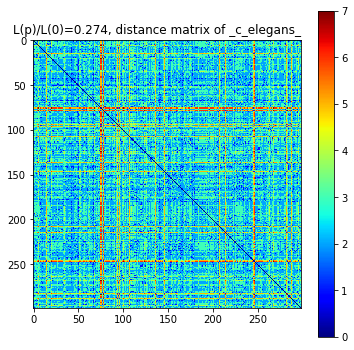

In [29]:
################
#plot distance matrix
################
UG = G.to_undirected(G)
rgl_latt=nx.watts_strogatz_graph(np.size(UG.nodes),np.int64(np.ceil(np.float64(np.size(UG.edges))/np.size(UG.nodes))),0)
# plt.figure(figsize=(20,20))
# nx.draw_networkx(rgl_latt,node_size=50,style='dashed',width=0.3,)
# plt.savefig("watts_strogatz_p_0_"+animal+".eps")
L0 = nx.average_shortest_path_length(rgl_latt)
C0 = nx.average_clustering(rgl_latt)
dis_ma = nx.floyd_warshall_numpy(UG)
plt.figure(figsize=(6,6))
ax = plt.gca()
cmap = plt.cm.jet
cmap.set_bad('white',1.)
im = ax.imshow(dis_ma,cmap =cmap)
plt.colorbar(im)
plt.title("L(p)/L(0)={0:1.3f}".format(np.mean(dis_ma)/L0)+", distance matrix of "+animal,loc = 'right')
plt.savefig("./distance_matrix_of"+animal+"undirect.eps")



In [18]:
print(nx.average_shortest_path_length(G))

2.81108168167


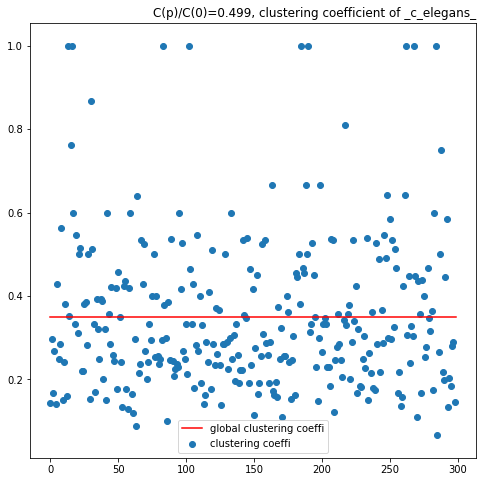

In [25]:
################
#plot clustering coefficient, convert to undirected graph
################
cc = nx.clustering(UG)
cc_values = cc.values()
plt.figure(figsize=(8,8))
plt.scatter(np.arange(np.size(cc_values)),cc_values,label = 'clustering coeffi')
plt.plot([0,np.size(cc_values)],[nx.average_clustering(UG),nx.average_clustering(UG)],label = 'global clustering coeffi',c ='r')
plt.legend()
plt.title("C(p)/C(0)={0:2.3f}".format(nx.average_clustering(UG)/C0)+", clustering coefficient of "+animal,loc = 'right')
plt.savefig("./cc_of_"+animal+".eps")

